# 134B Week5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

For the following problems consider the following three firms:
- XYZ mines copper, with fixed costs of $0.50/lb and variable cost of $0.40/lb.
- Wirco produces wire. It buys copper and manufactures wire. One pound of copper
can be used to produce one unit of wire, which sells for the price of copper plus $5.
Fixed cost per unit is $3 and noncopper variable cost is $1.50.
- Telco installs telecommunications equipment and uses copper wire from Wirco as an
input. For planning purposes, Telco assigns a fixed revenue of $6.20 for each unit of
wire it uses.

The 1-year forward price of copper is $1/lb. The 1-year continuously compounded interest
rate is 6%. One-year option prices for copper are shown in the table below

![table](../img/134B_Week5_1.png "Title")

In your answers, at a minimum consider copper prices in 1 year of $0.80, $0.90, $1.00,
$1.10, and $1.20.

## Exercise 4.1
If XYZ does nothing to manage copper price risk, what is its profit 1 year from
now, per pound of copper? If on the other hand XYZ sells forward its expected
copper production, what is its estimated profit 1 year from now? Construct graphs
illustrating both unhedged and hedged profit.

### Solution:
Note: XYZ's role is producing copper.

If we short the forward contract of price \$1.0, the payoff in the maturity:
$$ -S_T + 1$$

Then, we construct the table:

In [ ]:
data = {
    "Copper price in one year": [0.70, 0.80, 0.90, 1.00, 1.10, 1.20],
    "Total cost": [0.90, 0.90, 0.90, 0.90, 0.90, 0.90],
    "Unhedged profit": [-0.20, -0.10, 0.0, 0.10, 0.20, 0.30],
    "Profit on short forward": [0.30, 0.20, 0.10, 0.0, -0.10, -0.20],
    "Net income on hedged profit": [0.10, 0.10, 0.10, 0.10, 0.10, 0.10],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

In [ ]:
## Draw the plot
plt.figure(figsize=(10, 6))
plt.plot(df["Copper price in one year"], df["Unhedged profit"], label="Unhedged profit", marker='o')
plt.plot(df["Copper price in one year"], df["Profit on short forward"], label="Profit on short forward", marker='o')
plt.plot(df["Copper price in one year"], df["Net income on hedged profit"], label="Net income on hedged profit", marker='o')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Copper Price vs Profit")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

## Exercise 4.2
Suppose the 1-year copper forward price were $0.80 instead of $1. If XYZ were to
sell forward its expected copper production, what is its estimated profit 1 year from
now? Should XYZ produce copper? What if the forward copper price is $0.45?

### Solution:
Similarly, we short forwards with different price:

In [ ]:
# Define the data with price 0.8
data = {
    "Copper price in one year": [0.70, 0.80, 0.90, 1.00, 1.10, 1.20],
    "Total cost": [0.90, 0.90, 0.90, 0.90, 0.90, 0.90],
    "Unhedged profit": [-0.20, -0.10, 0.0, 0.10, 0.20, 0.30],
    "Profit on short forward": [0.10, 0.0, -0.10, -0.20, -0.30, -0.40],
    "Net income on hedged profit": [-0.10, -0.10, -0.10, -0.10, -0.10, -0.10],
}

# Create the DataFrame
df1 = pd.DataFrame(data)

df1

In [ ]:
# Define the data with price 0.45
data = {
    "Copper price in one year": [0.70, 0.80, 0.90, 1.00, 1.10, 1.20],
    "Total cost": [0.90, 0.90, 0.90, 0.90, 0.90, 0.90],
    "Unhedged profit": [-0.20, -0.10, 0.0, 0.10, 0.20, 0.30],
    "Profit on short forward": [-0.25, -0.35, -0.45, -0.55, -0.65, -0.75],
    "Net income on hedged profit": [-0.45, -0.45, -0.45, -0.45, -0.45, -0.45],
}

# Create the DataFrame
df2 = pd.DataFrame(data)

df2

Although the copper forward price of $0.45 is below our total costs of $0.90, it is higher than the
variable cost of $0.40. It still makes sense to produce copper because even at a price of $0.45 in
one year, we will be able to partially cover our fixed costs.

## Exercise 4.3
Compute estimated profit in 1 year if XYZ buys a put option with a strike of $0.95,
$1.00, or $1.05. Draw a graph of profit in each case.

### Solution:
Recall we buy a put option, the payoff in the maturity:
$$ \max(0, K-S_T) $$

Then the overall pay-off:
$$ S_T + \max(0,K-S_T) = \max(S_T,K) $$

Capped from below.

Also, since the interest rate is compounded continuously. We need to compute the effective interest rate.

In [ ]:
# Compute the effective interest rate
r = 0.06

r_effective = np.exp(r) - 1
print(f"Effective interest rate: {r_effective:.2%}")

Then we can compute the net profit and draw diagram

In [ ]:
cost = 0.90
# Define the copper price
x = np.linspace(0.70, 1.20, 100)
# Define the profit on buying the put option
strike095 = 0.95
strike100 = 1
strike105 = 1.05
ppremium095 = 0.0178*(1+r_effective)
ppremium100 = 0.0376*(1+r_effective)
ppremium105 = 0.0665*(1+r_effective)
put095 = np.maximum(strike095 - x, 0)
put100 = np.maximum(strike100 - x, 0)
put105 = np.maximum(strike105 - x, 0)

plt.figure(figsize=(10, 6))
plt.plot(x, put095 + x - ppremium095 - cost, label="Profit on buying the put option with strike 0.95", color='orange')
plt.plot(x, put100 + x - ppremium100 - cost, label="Profit on buying the put option with strike 1.00", color='green')
plt.plot(x, put105 + x - ppremium105 - cost, label="Profit on buying the put option with strike 1.05", color='blue')

plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on buying the put option")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

## Exercise 4.4
Compute estimated profit in 1 year if XYZ sells a call option with a strike of $0.95,
$1.00, or $1.05. Draw a graph of profit in each case

### Solution::
Similarly, we sell a call option, the payoff:
$$ -\max(0,S_T - K) $$

Then the net payoff is:
$$ S_T - \max(0, S_T - K) = -\max(S_T, K)$$

Now we need to add the part we sell with interest.

In [ ]:
# Define the three call options
call095 = np.maximum(x - strike095, 0)
call100 = np.maximum(x - strike100, 0)
call105 = np.maximum(x - strike105, 0)

cpremium095 = 0.0694*(1+r_effective)
cpremium100 = 0.0376*(1+r_effective)
cpremium105 = 0.0194*(1+r_effective)
plt.figure(figsize=(10, 6))
plt.plot(x, x - call095 + cpremium095 - cost, label="Profit on selling the call option with strike 0.95", color='orange')
plt.plot(x, x - call100 + cpremium100 - cost, label="Profit on selling the call option with strike 1.00", color='green')
plt.plot(x, x - call105 + cpremium105 - cost, label="Profit on selling the call option with strike 1.05", color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

## Exercise 4.5
Compute estimated profit in 1 year if XYZ buys collars with the following strikes:
- a. $0.95 for the put and $1.00 for the call.
- b. $0.975 for the put and $1.025 for the call.
- c. $1.05 for the put and $1.05 for the call.

Draw a graph of profit in each case.

### Solution:
We compute the payoff of the collars and net profits:

In [9]:
# Define the new options
strike0975 = 0.975
strike1025 = 1.025
cpremium975 = 0.05*(1+r_effective)
cpremium1025 = 0.0274*(1+r_effective)
call0975 = np.maximum(x - strike0975, 0)
call1025 = np.maximum(x - strike1025, 0)
ppremium0975 = 0.0265*(1+r_effective)
ppremium1025 = 0.0509*(1+r_effective)
put0975 = np.maximum(strike0975 - x, 0)
put1025 = np.maximum(strike1025 - x, 0)



In [ ]:
# collar 1
plt.figure(figsize=(10, 6))
plt.plot(x, x+ put095 - ppremium095 - call100 + cpremium100 - cost, label="Profit on selling the call option with strike 0.975", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option with strike 0.975")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# collar 2
plt.figure(figsize=(10, 6))
plt.plot(x, x + put0975 - ppremium0975 - call1025 + cpremium1025 - cost, label="Profit on selling the call option with strike 1.025", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option with strike 1.025")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# collar 3
plt.figure(figsize=(10, 6))
plt.plot(x, x + put105 - ppremium105 - call105 + cpremium105 - cost, label="Profit on selling the call option with strike 1.075", color='orange')

plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option with strike 1.075")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()


The last one is perfectly hedged.

## Exercise 4.6
Compute estimated profit in 1 year if XYZ buys paylater puts as follows (the net
premium may not be exactly zero):
- a. Sell one 1.025-strike put and buy two 0.975-strike puts.
- b. Sell two 1.034-strike puts and buy three 1.00-strike puts.

Draw a graph of profit in each case.

### Solution:

In [13]:
# Define the new options
strike1034 = 1.034
cpremium1034 = 0.0243*(1+r_effective)
call1034 = np.maximum(x - strike1034, 0)
ppremium1034 = 0.0563*(1+r_effective)
put1034 = np.maximum(strike1034 - x, 0)

In [ ]:
# Portfolio 1
plt.figure(figsize=(10, 6))
plt.plot(x, x - put1025 + ppremium1025 + 2*put0975 - 2*ppremium0975 - cost, label="Portfolio 1", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Portfolio 1")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Portfolio 2
plt.figure(figsize=(10, 6))
plt.plot(x, x - 2*put1034 + 2*ppremium1034 + 3*put100 - 3*ppremium100 - cost, label="Portfolio 2", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Portfolio 2")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

## Exercise 4.7
If Telco does nothing to manage copper price risk, what is its profit 1 year from now,
per pound of copper that it buys? If it hedges the price of wire by buying copper forward, what is its estimated profit 1 year from now? Construct graphs illustrating
both unhedged and hedged profit.

### Solution:
Now the role switched, we are the buyer now. 

Similar to the exercise 1, we can construct the profit table.

In [ ]:
data = {
    "Copper price in one year": [0.70, 0.80, 0.90, 1.00, 1.10, 1.20],
    "Total cost": [5.70, 5.80, 5.90, 6.00, 6.10, 6.20],
    "Unhedged profit": [0.50, 0.40, 0.30, 0.20, 0.10, 0.0],
    "Profit on long forward": [-0.3, -0.2, -0.1, 0, 0.10, 0.20],
    "Net income on hedged profit": [0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
}

# Create the DataFrame
df3 = pd.DataFrame(data)

# Display the DataFrame
df3

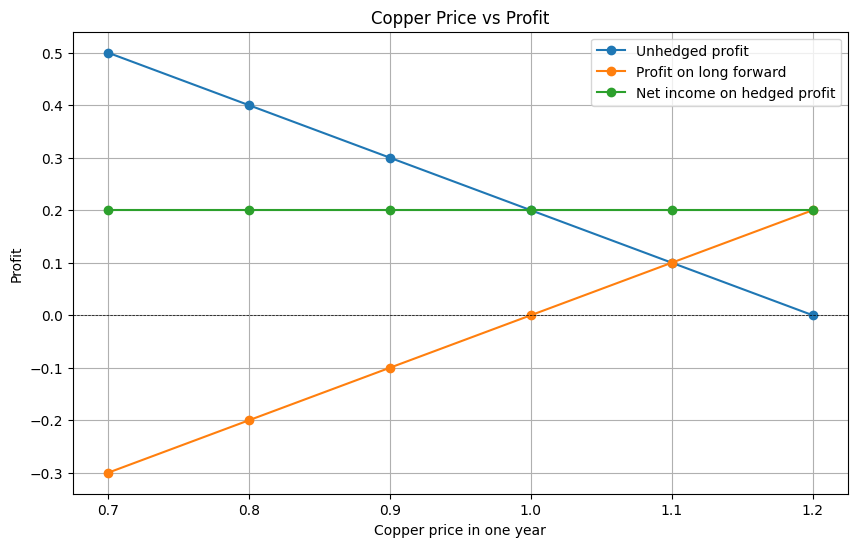

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df3["Copper price in one year"], df3["Unhedged profit"], label="Unhedged profit", marker='o')
plt.plot(df3["Copper price in one year"], df3["Profit on long forward"], label="Profit on long forward", marker='o')
plt.plot(df3["Copper price in one year"], df3["Net income on hedged profit"], label="Net income on hedged profit", marker='o')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Copper Price vs Profit")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()

plt.show()

## Exercise 4.8
Compute estimated profit in 1 year if Telco buys a call option with a strike of $0.95,
$1.00, or $1.05. Draw a graph of profit in each case.

### Solution:

Similar to the exercise 3.

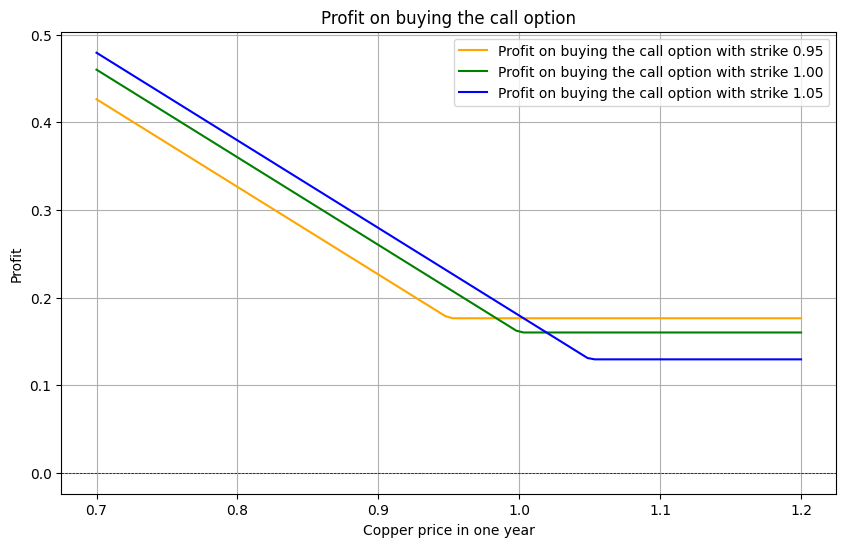

In [27]:
profit_Telco = 6.2
cost_wire = 5 + x

plt.figure(figsize=(10, 6))
plt.plot(x, profit_Telco - cost_wire + call095 - cpremium095, label="Profit on buying the call option with strike 0.95", color='orange')
plt.plot(x, profit_Telco - cost_wire + call100 - cpremium100, label="Profit on buying the call option with strike 1.00", color='green')
plt.plot(x, profit_Telco - cost_wire + call105 - cpremium105, label="Profit on buying the call option with strike 1.05", color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on buying the call option")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()

plt.grid()

plt.show()

## Exercise 4.9
Compute estimated profit in 1 year if Telco sells a put option with a strike of $0.95,
$1.00, or $1.05. Draw a graph of profit in each case.

### Solution:
Similarly:

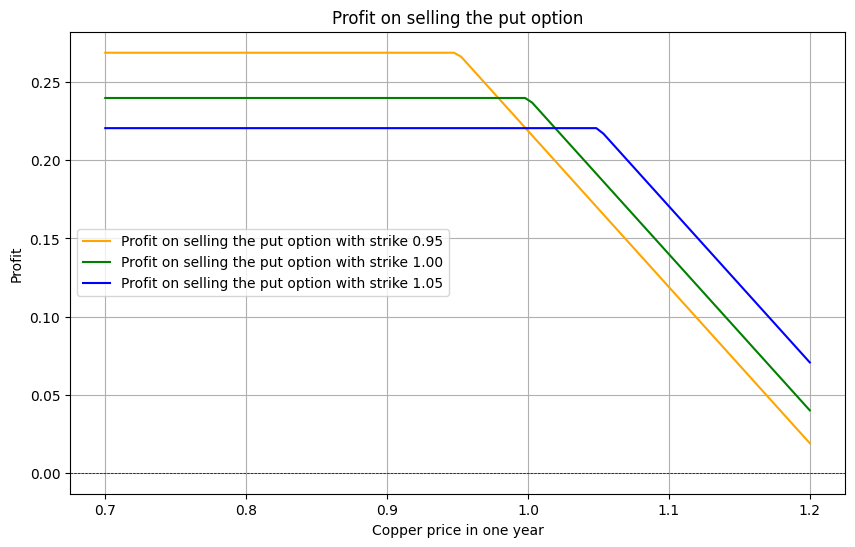

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x, profit_Telco - cost_wire - put095 + ppremium095, label="Profit on selling the put option with strike 0.95", color='orange')
plt.plot(x, profit_Telco - cost_wire - put100 + ppremium100, label="Profit on selling the put option with strike 1.00", color='green')
plt.plot(x, profit_Telco - cost_wire - put105 + ppremium105, label="Profit on selling the put option with strike 1.05", color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the put option")

plt.xlabel("Copper price in one year")
plt.ylabel("Profit")

plt.legend()

plt.grid()

plt.show()

## Exercise 4.10
Compute estimated profit in 1 year if Telco sells collars with the following strikes:
- a. $0.95 for the put and $1.00 for the call.
- b. $0.975 for the put and $1.025 for the call.
- c. $0.95 for the put and $0.95 for the call.

Draw a graph of profit in each case.

### Solution:
Similarly

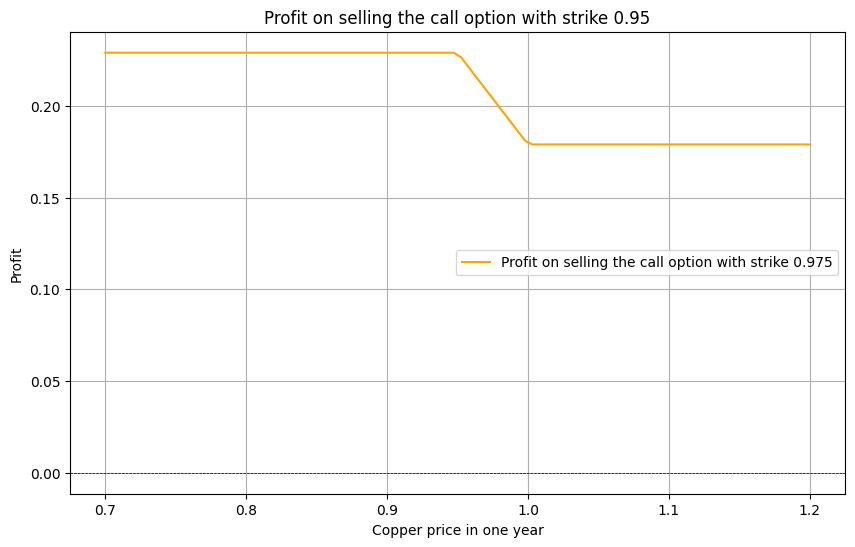

In [32]:
# collar 1
plt.figure(figsize=(10, 6))
plt.plot(x, profit_Telco - cost_wire - put095 + ppremium095 + call100 - cpremium100, label="Profit on selling the call option with strike 0.975", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option with strike 0.95")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

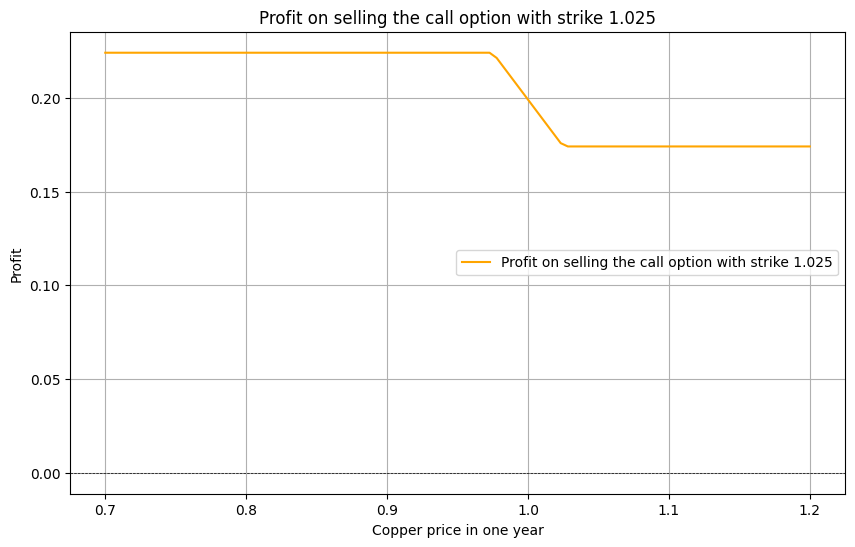

In [33]:
# collar 2
plt.figure(figsize=(10, 6))
plt.plot(x, profit_Telco - cost_wire - put0975 + ppremium0975 + call1025 - cpremium1025, label="Profit on selling the call option with strike 1.025", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option with strike 1.025")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

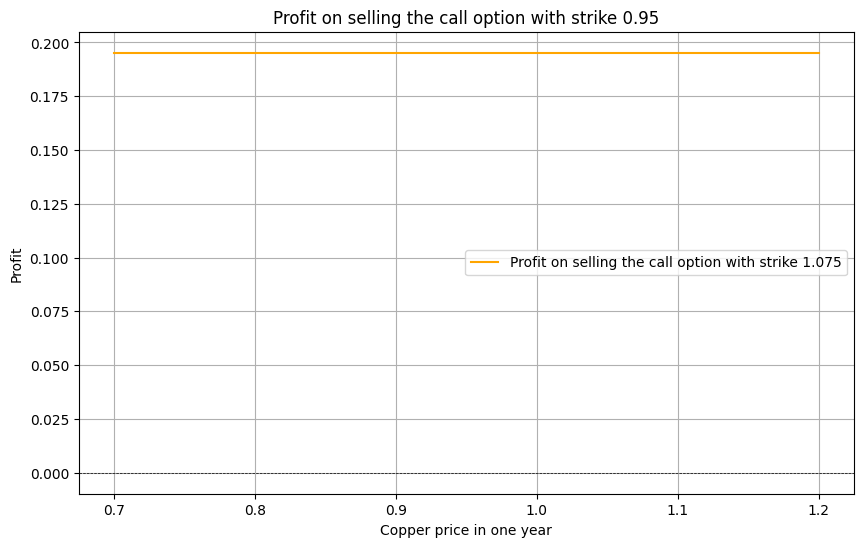

In [36]:
# collar 3
plt.figure(figsize=(10, 6))
plt.plot(x, profit_Telco - cost_wire - put095 + ppremium095 + call095 - cpremium095, label="Profit on selling the call option with strike 1.075", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Profit on selling the call option with strike 0.95")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

## Exercise 4.11
Compute estimated profit in 1 year if Telco buys paylater calls as follows (the net
premium may not be exactly zero):
- a. Sell one 0.975-strike call and buy two 1.034-strike calls.
- b. Sell two 1.00-strike calls and buy three 1.034-strike calls.

Draw a graph of profit in each case.

### Solution:
Similarly

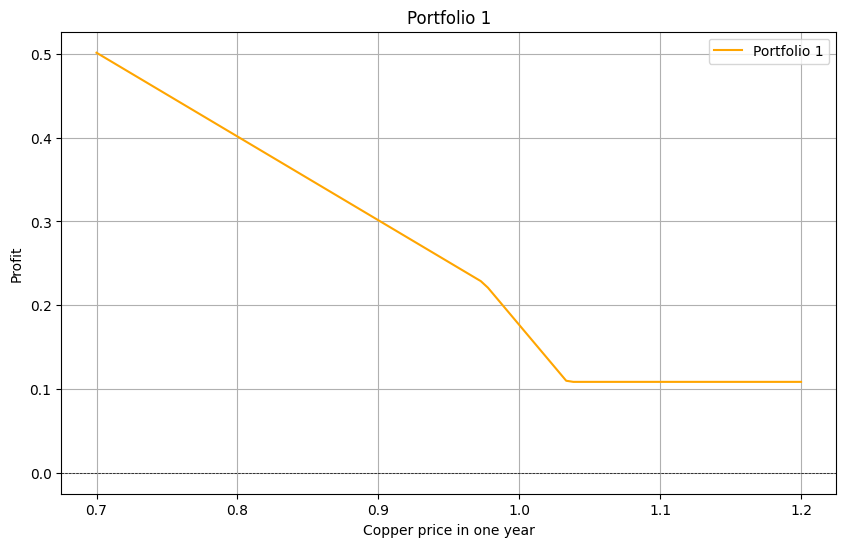

In [37]:
# Portfolio 1
plt.figure(figsize=(10, 6))
plt.plot(x, profit_Telco - cost_wire - call0975 + cpremium975 + 2*call1034 - 2*cpremium1034 , label="Portfolio 1", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Portfolio 1")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

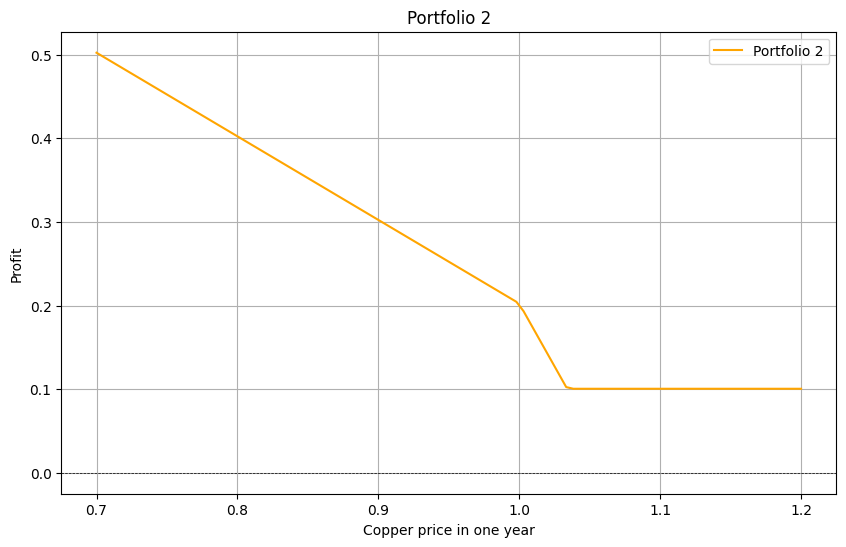

In [38]:
# Portfolio 2
plt.figure(figsize=(10, 6))
plt.plot(x , profit_Telco - cost_wire - 2*call100 + 2*cpremium100 + 3*call1034 - 3*cpremium1034 , label="Portfolio 2", color='orange')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title("Portfolio 2")
plt.xlabel("Copper price in one year")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

## Exercise 4.12
Suppose thatWirco does nothing to manage the risk of copper price changes. What
is its profit 1 year from now, per pound of copper? Suppose that Wirco buys copper
forward at $1. What is its profit 1 year from now?

### Solution:
This is a very important exercise to really understand the benefits and pitfalls of hedging
strategies. Wirco needs copper as an input, which means that its costs increase with the price of
copper. We may, therefore, think that they need to hedge against increases in the copper price.
However, we must not forget that the price of wire, the source of Wirco’s revenues, also depends
positively on the price of copper: The price Wirco can obtain for one unit of wire is $5 plus the
price of copper. We will see that those copper price risks cancel each other out. Mathematically,

- Wirco’s cost per unit of wire: $3 + $1.50 + ST
- Wirco’s revenue per unit of wire: $5 + ST
and ST is the price of copper after one year. Therefore, we can determine Wirco’s profits as:

Profit = Revenue – Cost = $5 + ST − ($3 + $1.50 + ST ) = $0.50

We see that the profits of Wirco do not depend on the price of copper. Cost and revenue copper
price risk cancel each other out. In this situation, if we buy a long forward contract, we do in fact
introduce copper price risk! To understand this, add a long forward contract to the profit
equation:

Profit with forward: = $5 + ST − ($3 + $1.50 + ST ) + ST − $1 = ST − $0.50

In [39]:
data = {
    "Copper price in one year": [0.70, 0.80, 0.90, 1.00, 1.10, 1.20],
    "Total cost": [5.20, 5.30, 5.40, 5.50, 5.60, 5.70],
    "Total Revenue": [5.70, 5.80, 5.90, 6.00, 6.10, 6.20],
    "Unhedged profit": [0.50, 0.50, 0.50, 0.50, 0.50, 0.50],
    "Profit on long forward": [-0.3, -0.2, -0.1, 0, 0.10, 0.20],
    "Net income on hedged profit": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
}

# Create the DataFrame
df4 = pd.DataFrame(data)

# Display the DataFrame
df4

,Copper price in one year,Total cost,Total Revenue,Unhedged profit,Profit on long forward,Net income on hedged profit
0,0.7,5.2,5.7,0.5,-0.3,0.2
1,0.8,5.3,5.8,0.5,-0.2,0.3
2,0.9,5.4,5.9,0.5,-0.1,0.4
3,1.0,5.5,6.0,0.5,0.0,0.5
4,1.1,5.6,6.1,0.5,0.1,0.6
5,1.2,5.7,6.2,0.5,0.2,0.7
